In [33]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sbn


def create_class_array(player_list):
    class_input = np.array([[player_stat.pass_attempts,
                             player_stat.pass_completions,
                             player_stat.pass_yards,
                             player_stat.pass_touchdowns,
                             player_stat.interceptions,
                             player_stat.rush_attempts,
                             player_stat.rush_yards,
                             player_stat.rush_touchdowns] for player_stat in player_list])
    class_answer = np.array([player_stat.score for player_stat in player_list])
    return class_input, class_answer

train_input, train_answer = create_class_array(PlayerData.objects.filter(game__week__lte=13))
test_input, test_answer = create_class_array(PlayerData.objects.filter(game__week=14))

In [34]:
# Random Forest Classifier
rfc = RandomForestClassifier ()
rfc.fit(train_input, train_answer)
predicted = rfc.predict(test_input)
accuracy_score(test_answer, predicted)

0.32743362831858408

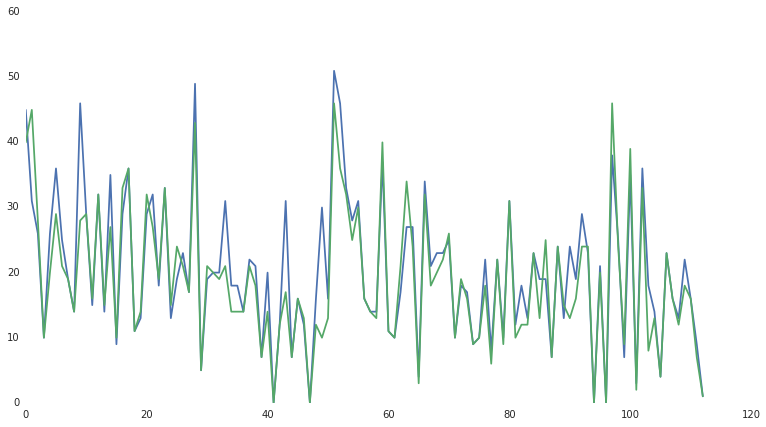

In [44]:
%matplotlib inline
plt.figure(figsize=(13,7))
plt.plot(test_answer)
plt.plot(predicted)